In [1]:
import numpy as np
import pandas as pd

#視覺化
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [2]:
data = pd.read_csv('amazon_alexa.tsv', delimiter = '\t', quoting = 3)

# getting the shape of the data
data.shape

(3150, 5)

In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
# 計數，平均值，標準差，最小值，百分位數25(低)、50(中位數)、75(高)，最大值
data.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [5]:
# 檢查數據集中是否有空值
data.isnull().any()

rating              False
date                False
variation           False
verified_reviews    False
feedback            False
dtype: bool

In [6]:
# 用於分析評論長度的長度列
data['length'] = data['verified_reviews'].apply(len)
data.groupby('length').describe().sample(10)

rating                                               feedback  \
        count      mean       std  min   25%  50%  75%  max    count   
length                                                                 
237       2.0  5.000000  0.000000  5.0  5.00  5.0  5.0  5.0      2.0   
41       11.0  4.454545  1.293340  1.0  5.00  5.0  5.0  5.0     11.0   
584       1.0  1.000000       NaN  1.0  1.00  1.0  1.0  1.0      1.0   
133       6.0  4.166667  1.602082  1.0  4.25  5.0  5.0  5.0      6.0   
179       5.0  5.000000  0.000000  5.0  5.00  5.0  5.0  5.0      5.0   
247       4.0  4.000000  0.000000  4.0  4.00  4.0  4.0  4.0      4.0   
223       3.0  3.666667  1.154701  3.0  3.00  3.0  4.0  5.0      3.0   
286       3.0  3.000000  0.000000  3.0  3.00  3.0  3.0  3.0      3.0   
356       1.0  5.000000       NaN  5.0  5.00  5.0  5.0  5.0      1.0   
278       1.0  5.000000       NaN  5.0  5.00  5.0  5.0  5.0      1.0   

                                                     
            mean       std  min  25%  50%  75%  max  
length                                               
237     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
41      0.909091  0.301511  0.0  1.0  1.0  1.0  1.0  
584     0.000000       NaN  0.0  0.0  0.0  0.0  0.0  
133     0.833333  0.408248  0.0  1.0  1.0  1.0  1.0  
179     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
247     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
223     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
286     1.000000  0.000000  1.0  1.0  1.0  1.0  1.0  
356     1.000000       NaN  1.0  1.0  1.0  1.0  1.0  
278     1.000000       NaN  1.0  1.0  1.0  1.0  1.0

In [7]:
data.groupby('rating').describe()

feedback                                     length              \
          count mean  std  min  25%  50%  75%  max   count        mean   
rating                                                                   
1         161.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   161.0  195.658385   
2          96.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    96.0  250.020833   
3         152.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   152.0  208.098684   
4         455.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   455.0  179.338462   
5        2286.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  2286.0  109.006562   

                                                       
               std  min    25%    50%     75%     max  
rating                                                 
1       212.928219  1.0  36.00  120.0  284.00  1126.0  
2       270.179472  1.0  78.75  165.0  311.25  1688.0  
3       272.582517  1.0  54.00  131.0  286.00  1956.0  
4       216.415268  1.0  34.50  100.0  242.00  1362.0  
5       152.505019  1.0  27.00   65.0  136.00  2853.0

In [8]:
data.groupby('feedback').describe()

rating                                               length  \
           count      mean       std  min  25%  50%  75%  max   count   
feedback                                                                
0          257.0  1.373541  0.484688  1.0  1.0  1.0  2.0  2.0   257.0   
1         2893.0  4.737643  0.546544  3.0  5.0  5.0  5.0  5.0  2893.0   

                                                                   
                mean         std  min   25%    50%    75%     max  
feedback                                                           
0         215.964981  236.895519  1.0  53.0  137.0  291.0  1688.0  
1         125.274456  175.036515  1.0  29.0   70.0  155.0  2853.0

In [9]:
ratings = data['rating'].value_counts()

label_rating = ratings.index
size_rating = ratings.values

colors = ['plum', 'lightblue', 'aqua', 'gold', 'palegreen']

rating_piechart = go.Pie(labels = label_rating,
                         values = size_rating,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df = [rating_piechart]

layout = go.Layout(
           title = 'Distribution of Ratings for Alexa')

fig = go.Figure(data = df,
                 layout = layout)

py.iplot(fig)

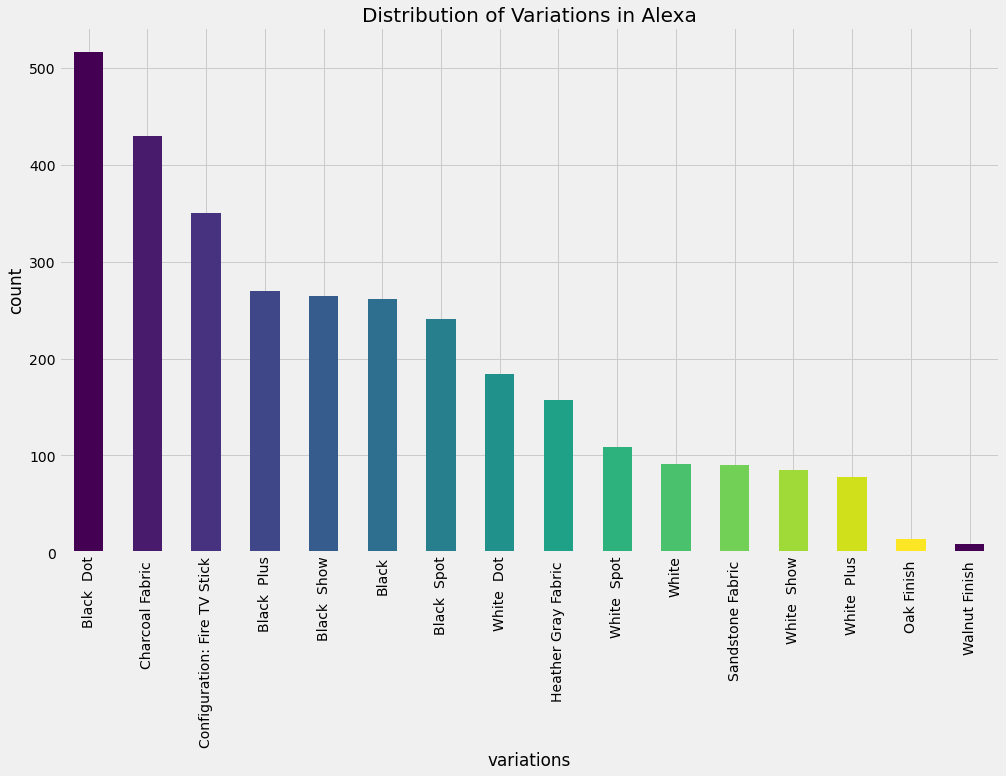

In [10]:
color = plt.cm.viridis(np.linspace(0, 1, 15))
data['variation'].value_counts().plot.bar(color = color, figsize = (15, 9))
plt.title('Distribution of Variations in Alexa', fontsize = 20)
plt.xlabel('variations')
plt.ylabel('count')
plt.show()

In [11]:
feedbacks = data['feedback'].value_counts()
label_feedback = feedbacks.index
size_feedback = feedbacks.values
colors = ['royalblue', 'skyblue']

feedback_piechart = go.Pie(labels = label_feedback,
                         values = size_feedback,
                         marker = dict(colors = colors),
                         name = 'Alexa', hole = 0.3)

df2 = [feedback_piechart]
layout = go.Layout(
           title = 'Distribution of Feedbacks for Alexa')
fig = go.Figure(data = df2,
                 layout = layout)
py.iplot(fig)

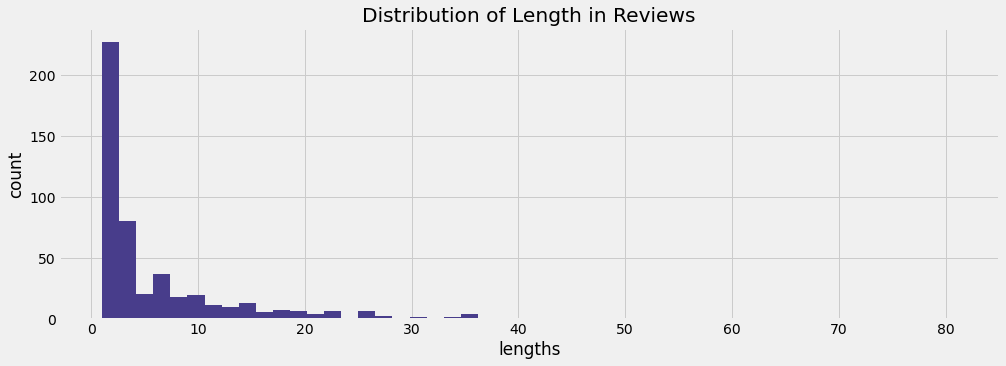

In [12]:
data['length'].value_counts().plot.hist(color = 'darkslateblue', figsize = (15, 5), bins = 50)
plt.title('Distribution of Length in Reviews')
plt.xlabel('lengths')
plt.ylabel('count')
plt.show()

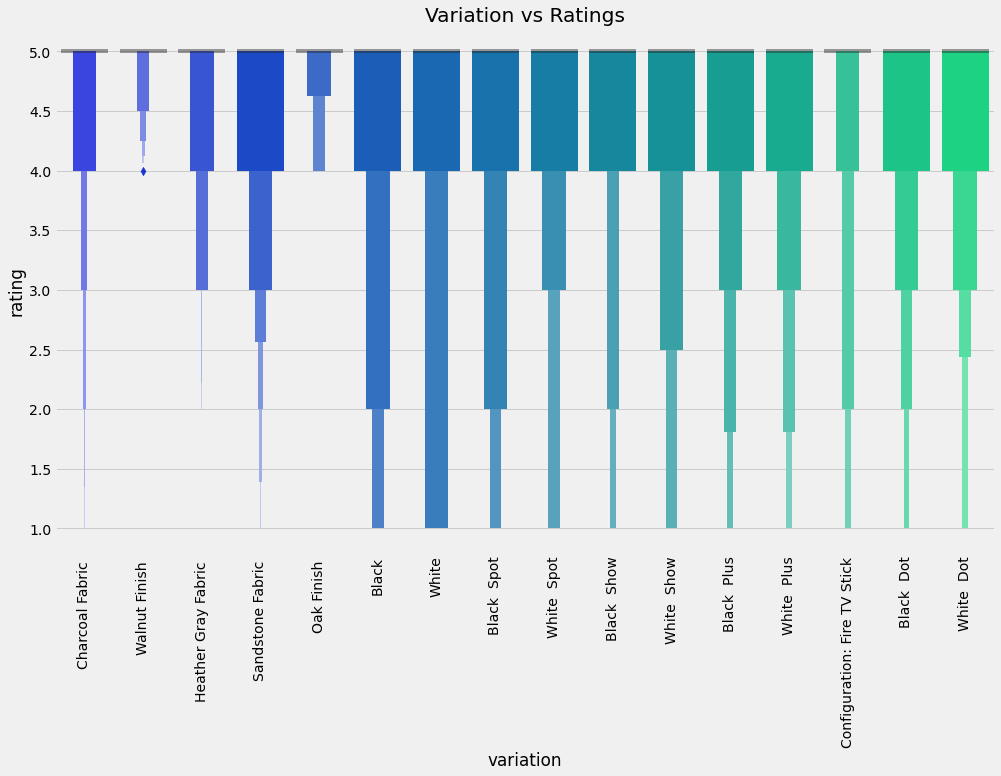

In [13]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.boxenplot(data['variation'], data['rating'], palette = 'winter')
plt.title("Variation vs Ratings")
plt.xticks(rotation = 90)
plt.show()

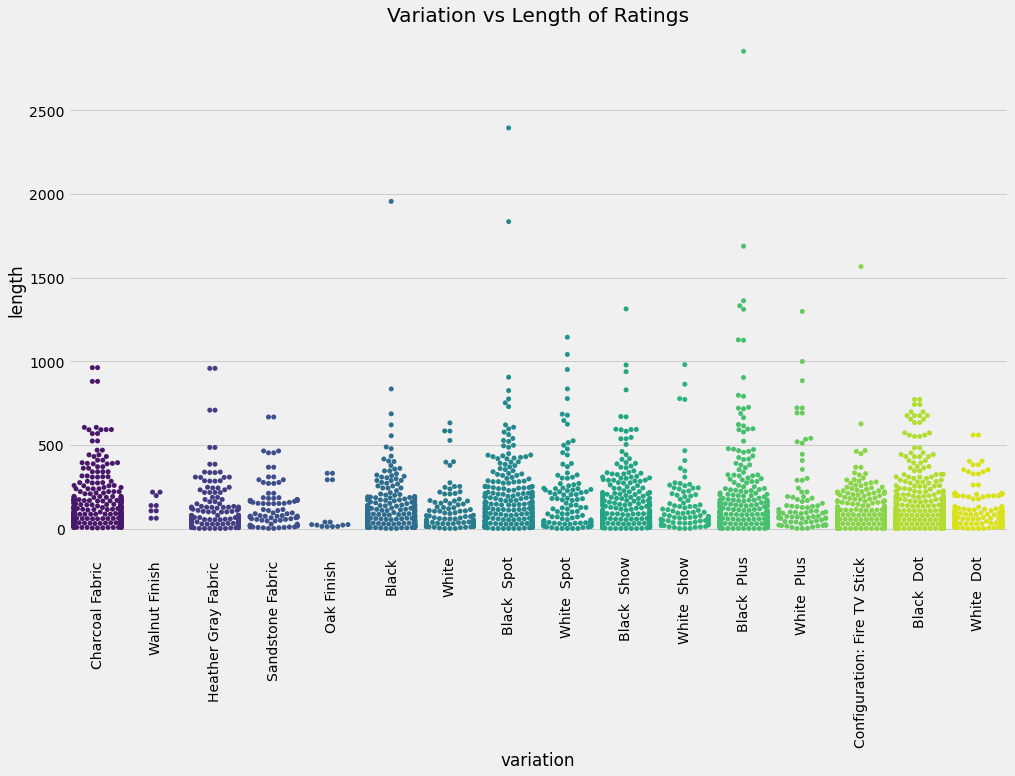

In [14]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.swarmplot(data['variation'], data['length'], palette = 'viridis')
plt.title("Variation vs Length of Ratings")
plt.xticks(rotation = 90)
plt.show()

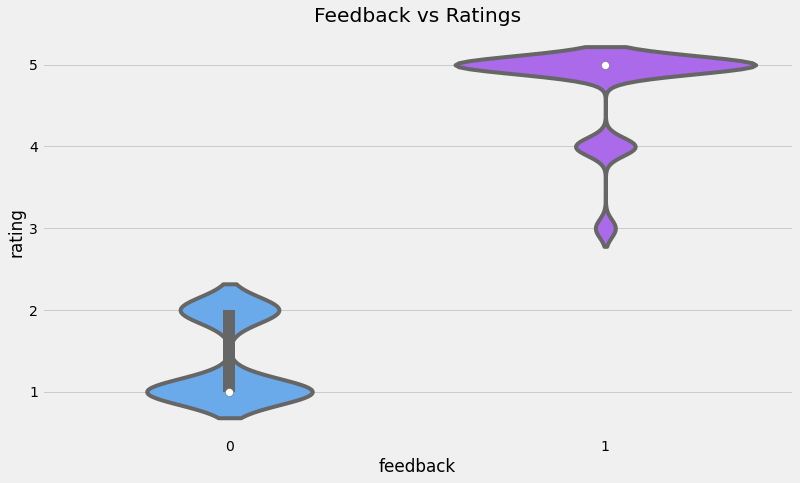

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.violinplot(data['feedback'], data['rating'], palette = 'cool')
plt.title("Feedback vs Ratings")
plt.show()

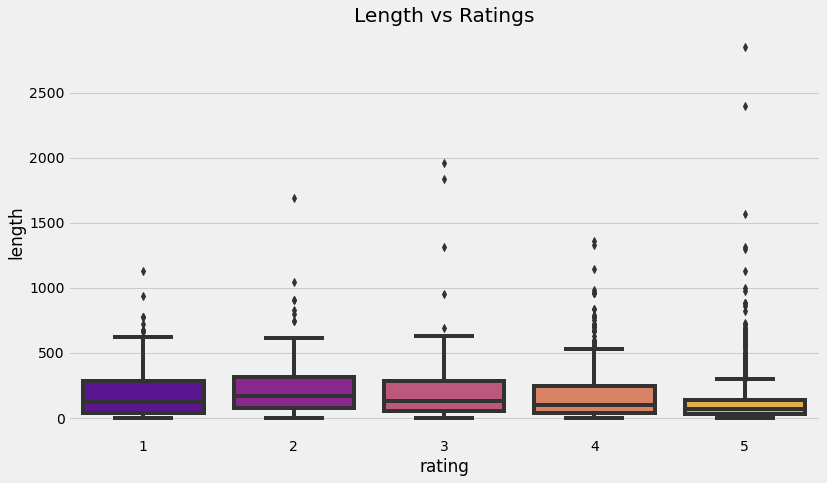

In [16]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.boxplot(data['rating'], data['length'], palette = 'plasma')
plt.title("Length vs Ratings")
plt.show()

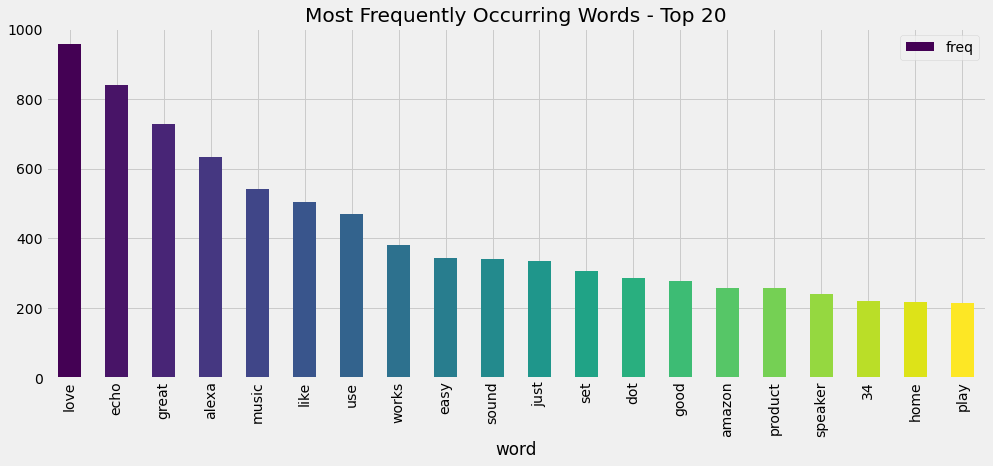

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data.verified_reviews)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

plt.style.use('fivethirtyeight')
color = plt.cm.viridis(np.linspace(0, 1, 20))
frequency.head(20).plot(x='word', y='freq', kind='bar', figsize=(15, 6), color = color)
plt.title("Most Frequently Occurring Words - Top 20")
plt.show()

In [18]:
# !pip install wordcloud

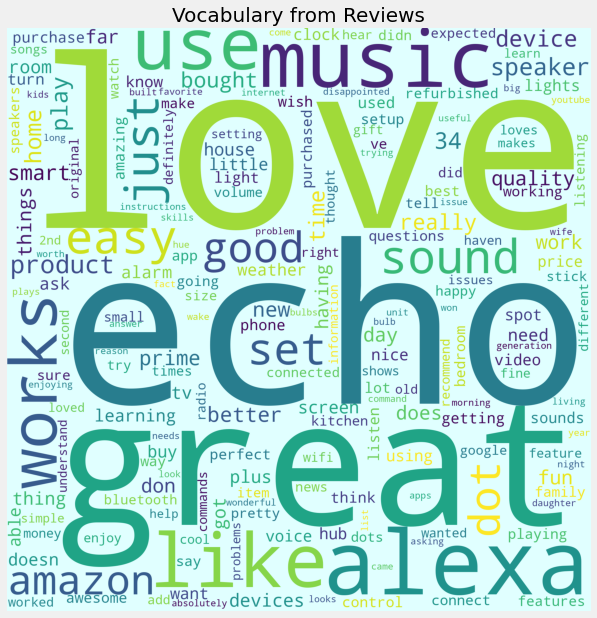

In [19]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'lightcyan', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Reviews", fontsize = 20)
plt.show()

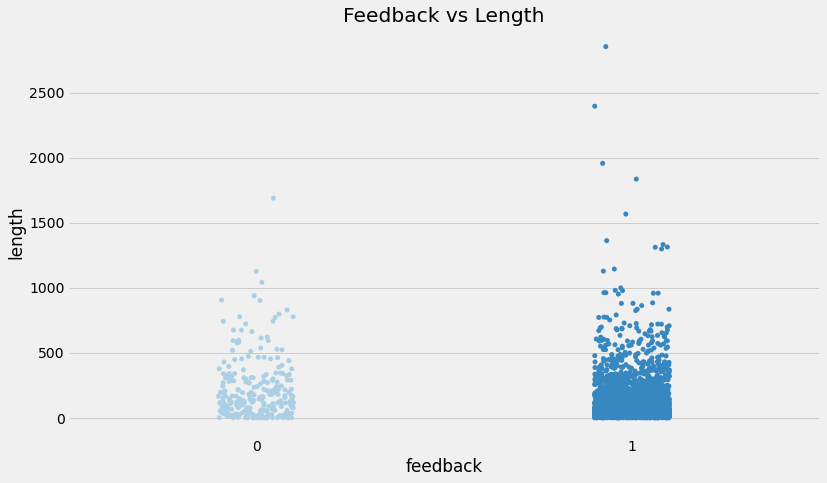

In [20]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('fivethirtyeight')

sns.stripplot(data['feedback'], data['length'], palette = 'Blues')
plt.title("Feedback vs Length")
plt.show()

In [21]:
trace = go.Scatter3d(
    x = data['length'],
    y = data['rating'],
    z = data['variation'],
    name = 'Amazon Alexa',
    mode='markers',
    marker=dict(
        size=10,
        color = data['rating'],
        colorscale = 'viridis',))

df = [trace]
layout = go.Layout(
    title = 'Length vs Variation vs Ratings',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0))

fig = go.Figure(data = df, layout = layout)
iplot(fig)

In [22]:
# !pip install spacy

In [23]:
# !pip uninstall spacy

In [24]:
# !pip install nltk

# !pip install spacy==2.0.0
# !pip install spacy==3.0.0
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-3.0.6.tar.gz
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.1.0/en_core_web_sm-2.1.0.tar.gz
# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

In [25]:
# !python -m spacy validate

In [26]:
# !pip install nltk

# !pip install spacy==2.3.5

# !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.3.1/en_core_web_sm-2.3.1.tar.gz

# !pip install pyresparser

In [27]:
import spacy
nlp = spacy.load('en_core_web_lg')

# import en_core_web_sm
# nlp = en_core_web_sm.load()

def explain_text_entities(text):
    doc = nlp(text)
    for ent in doc.ents:
        print(f'Entity: {ent}, Label: {ent.label_}, {spacy.explain(ent.label_)}')
        
for i in range(15, 50):
    one_sentence = data['verified_reviews'][i]
    doc = nlp(one_sentence)
    spacy.displacy.render(doc, style='ent', jupyter=True)

In [28]:
# # !pip install stanfordcorenlp
# import sys
# print(sys.executable)

In [29]:
# importing the libraries for Natural Language Processing
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# cleaning the text
corpus = []
for i in range(0, 3150):
    review = re.sub('[^a-zA-Z]', ' ', data['verified_reviews'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [31]:
# creating bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
cv = CountVectorizer(max_features = 1500)
x = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 4].values

In [32]:
# splitting the dataset into Training and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
# Fitting Random Forest classifier with 100 trees to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [35]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [36]:
print(cm)
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 18  36]
 [  0 576]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.33      0.50        54
           1       0.94      1.00      0.97       576

    accuracy                           0.94       630
   macro avg       0.97      0.67      0.73       630
weighted avg       0.95      0.94      0.93       630

0.9428571428571428


In [43]:
#印混淆矩陣的副程式
def print_confusion_matrix(y_test,predict_x_test):
  #混淆矩陣
  cnf = confusion_matrix(y_test,predict_x_test)
  print(cnf)
  #準確度
  accuracy = accuracy_score(y_test,predict_x_test)
  print('accuracy:', round(accuracy,2))
  #精確度，所有預測陽性樣本中為準確陽性的
  precision = precision_score(y_test,predict_x_test)
  print('precision:', round(precision,2))
  #靈敏度，recall = sensitivity
  recall = recall_score(y_test,predict_x_test)
  print('sensitivity:', round(recall,2))
  #特異度
  tn1, fp1, fn1, tp1 = confusion_matrix(y_test, predict_x_test).ravel()
  specificity = tn1 / (tn1 + fp1)
  print('specificity:', round(specificity,2))
  print('---------------------------')

In [44]:
#計算混淆矩陣的套件
from sklearn.metrics import auc,confusion_matrix,precision_score,recall_score,accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score

#畫圖程式
def draw_confusion_matrix(y_test,predict_x_test):
  cnf = confusion_matrix(y_test,predict_x_test)
  sns.set()
  sns.heatmap(cnf,annot=True,fmt='.20g')
  #x軸命名
  plt.xlabel("predicted value")
  #y軸命名
  plt.ylabel("true value")

DT confusion_matrix6
[[ 24  30]
 [ 15 561]]
accuracy: 0.93
precision: 0.95
sensitivity: 0.97
specificity: 0.44
---------------------------


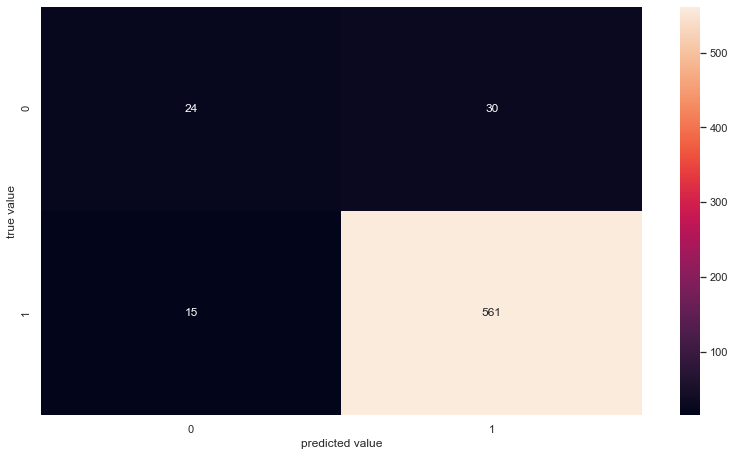

In [45]:
from sklearn import tree

#建立DT的分類器
trees = tree.DecisionTreeClassifier()
#訓練集的模型 X_train, X_test, y_train, y_test
trees.fit(X_train,y_train)
#預測測試集的資料
trees.predict(X_test)

#計算混淆矩陣
print('DT confusion_matrix6')
print_confusion_matrix(y_test,trees.predict(X_test))

#畫混淆矩陣圖
draw_confusion_matrix(y_test,trees.predict(X_test))

KNN confusion_matrix5
[[  4  50]
 [  0 576]]
accuracy: 0.92
precision: 0.92
sensitivity: 1.0
specificity: 0.07
---------------------------


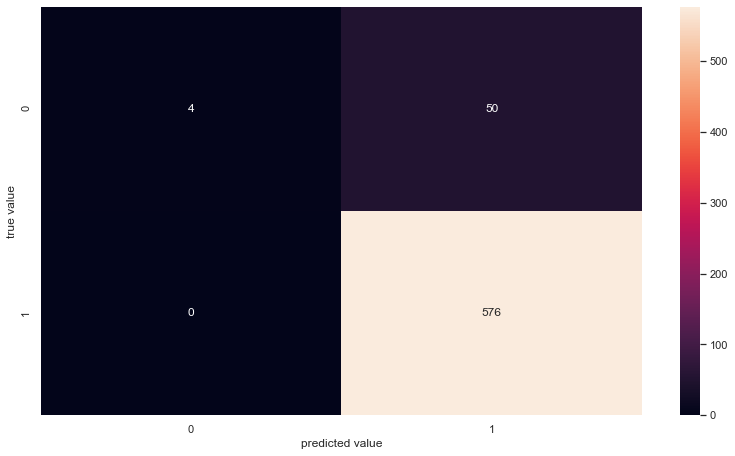

In [48]:
#knn的套件
from sklearn.neighbors import KNeighborsClassifier

#建立knn的分類器
knn = KNeighborsClassifier()
#訓練集的模型
knn.fit(X_train,y_train)
#預測測試集的資料
knn.predict(X_test)

#計算混淆矩陣
print('KNN confusion_matrix5')
print_confusion_matrix(y_test,knn.predict(X_test))

#畫混淆矩陣圖
draw_confusion_matrix(y_test,knn.predict(X_test))

ANN confusion_matrix1
[[  3  51]
 [  0 576]]
accuracy: 0.92
precision: 0.92
sensitivity: 1.0
specificity: 0.06
---------------------------


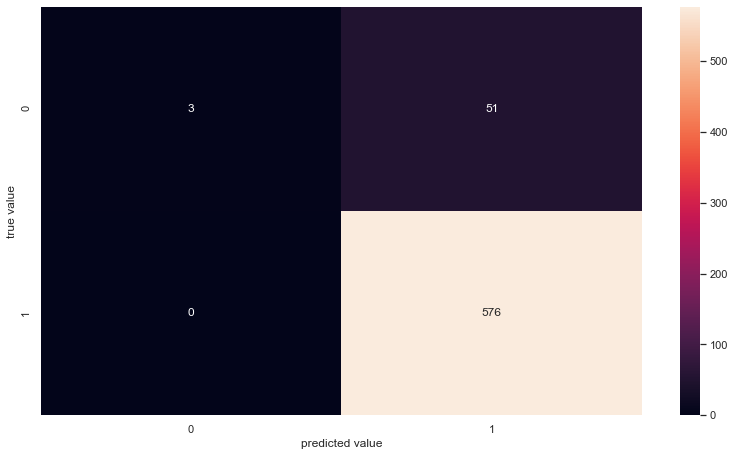

In [50]:
#ann的套件
from sklearn.neural_network import MLPClassifier

#建立ANN的分類器
clf = MLPClassifier(activation='relu',hidden_layer_sizes=(50, 50), solver='sgd', alpha=0.0001)
#訓練集的模型
clf.fit(X_train,y_train)  
#預測測試集的資料
clf.predict(X_test)

#計算混淆矩陣
print('ANN confusion_matrix1')
print_confusion_matrix(y_test,clf.predict(X_test))

#畫混淆矩陣圖
draw_confusion_matrix(y_test,clf.predict(X_test))

SVM confusion_matrix4
[[ 25  29]
 [  7 569]]
accuracy: 0.94
precision: 0.95
sensitivity: 0.99
specificity: 0.46
---------------------------


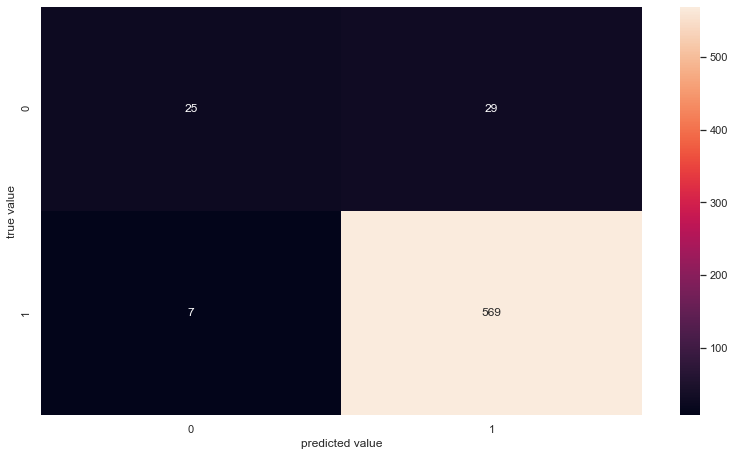

In [51]:
#svm的套件
from sklearn.svm import SVC
#建立svm分類器
#C=正規化係數，kernel=核函數，class_weight=變項的權重設定，probability=True(採用機率值計算)
svm = SVC(C=1, kernel='linear', class_weight={0: 1, 1: 2}, probability=True)
#訓練集的模型
svm.fit(X_train,y_train)
#預測測試集的資料
svm.predict(X_test)

#計算混淆矩陣
print('SVM confusion_matrix4')
print_confusion_matrix(y_test,svm.predict(X_test))

#畫混淆矩陣圖
draw_confusion_matrix(y_test,svm.predict(X_test))

roc_auc_score for KNN:  0.67
roc_auc_score for SVM:  0.9
roc_auc_score for ANN:  0.92
roc_auc_score for DT:  0.74
roc_auc_score for RF:  0.94


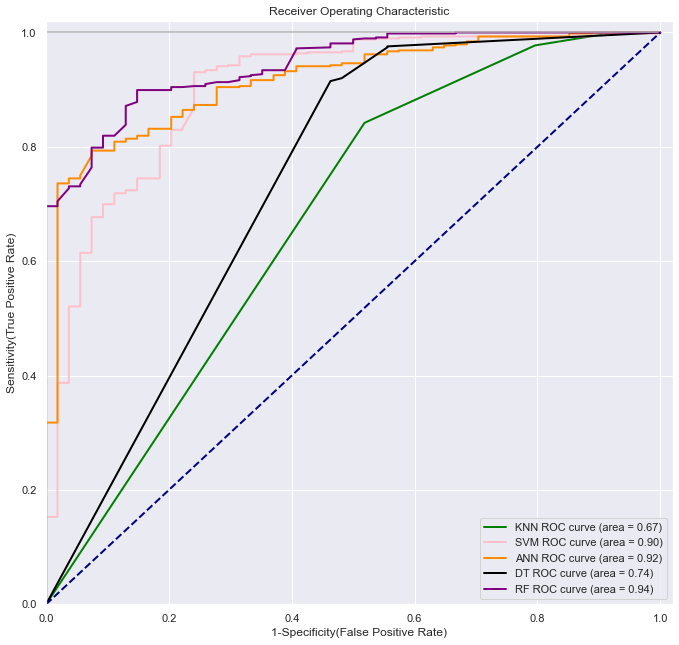

In [56]:
#knn
#轉換預測的機率值
y_score5 = knn.predict_proba(X_test)[:,1]
fpr1, tpr1, a1 = roc_curve(y_test,  y_score5)
#列出roc值
print('roc_auc_score for KNN: ',round(roc_auc_score(y_test, y_score5),2)) 

#svm
#轉換預測的機率值
y_score4 = svm.predict_proba(X_test)[:,1]
fpr2, tpr2, a2 = roc_curve(y_test,  y_score4)
#列出roc值
print('roc_auc_score for SVM: ',round(roc_auc_score(y_test, y_score4),2)) 

#ann
#轉換預測的機率值
y_score1 =clf.predict_proba(X_test)[:,1]
fpr3, tpr3, a3 = roc_curve(y_test,  y_score1)
#列出roc值
print('roc_auc_score for ANN: ',round(roc_auc_score(y_test, y_score1),2)) 

#DT
#轉換預測的機率值
y_score6 = trees.predict_proba(X_test)[:,1]
fpr4, tpr4, a4 = roc_curve(y_test,  y_score6)
print('roc_auc_score for DT: ',round(roc_auc_score(y_test, y_score6),2)) 

#rf
#轉換預測的機率值
y_score3 = classifier.predict_proba(X_test)[:,1]
fpr5, tpr5, a5 = roc_curve(y_test,  y_score3)
#列出roc值
print('roc_auc_score for RF: ',round(roc_auc_score(y_test, y_score3),2)) 

#各分類器的roc_auc值，使用fpr,tpr計算
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)


#畫出roc的圖
#圖的大小設定
plt.subplots(1, figsize=(10,10))
#圖的title    
plt.title('Receiver Operating Characteristic')
#曲線的大小設定
lw = 2
#畫每一條曲線
plt.plot(fpr1, tpr1, color='green', lw=lw, label='KNN ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='pink', lw=lw, label='SVM ROC curve (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='darkorange', lw=lw, label='ANN ROC curve (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='black', lw=lw, label='DT ROC curve (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='purple', lw=lw, label='RF ROC curve (area = %0.2f)' % roc_auc5)
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
#設x,y軸的範圍
plt.xlim([0.0, 1.02])
plt.ylim([0.0, 1.02])
#x,y軸的名稱
plt.ylabel('Sensitivity(True Positive Rate)')
plt.xlabel('1-Specificity(False Positive Rate)')
#每一曲線代表意義，列在右下角
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.show()

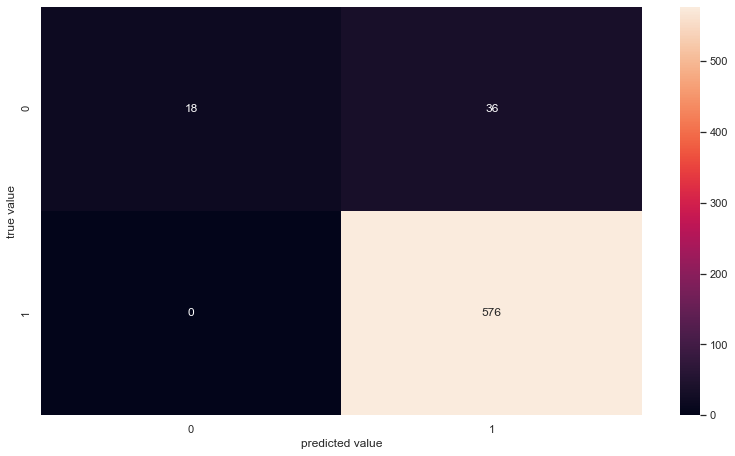

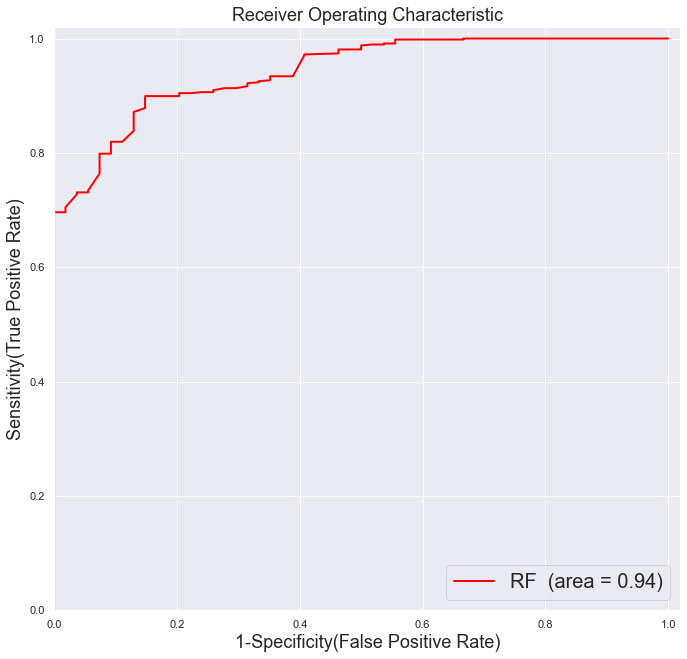

In [46]:
#畫混淆矩陣圖
draw_confusion_matrix(y_test,classifier.predict(X_test))

y_score1 = classifier.predict_proba(X_test)[:,1]
fpr1, tpr1, threshold1 = roc_curve(y_test,  y_score1)
roc_auc1 = auc(fpr1, tpr1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic',fontsize=18)
lw = 2
plt.plot(fpr1, tpr1, color='red', lw=lw, label='RF  (area = %0.2f)' % roc_auc1)
#x,y軸的範圍
plt.xlim([0.0, 1.02])
plt.ylim([0.0, 1.02])
#x,y軸的名稱
plt.ylabel('Sensitivity(True Positive Rate)',fontsize=18)
plt.xlabel('1-Specificity(False Positive Rate)',fontsize=18)
#圖示
plt.legend(loc="lower right",fontsize=20)
plt.show()

In [ ]:
# !pip install pyLDAvis

In [57]:
import nltk
from nltk import FreqDist
nltk.download('stopwords') # run this one time


import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
# import spacy

import gensim
from gensim import corpora

# libraries for visualization
# import pyLDAvis.gensim_models
# import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# !pip install -U gensim
# !pip install pyLDAvis

In [58]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

 # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

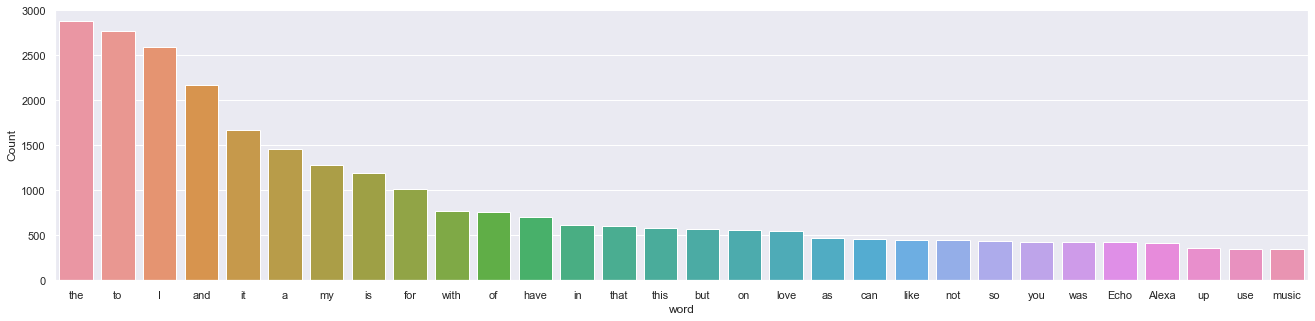

In [59]:
freq_words(data['verified_reviews']) 

In [60]:
# remove unwanted characters, numbers and symbols
data['verified_reviews'] = data['verified_reviews'].str.replace("[^a-zA-Z#]", " ")

In [61]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(rev):
    rev_new = " ".join([i for i in rev if i not in stop_words])
    return rev_new

# remove short words (length < 3)
data['verified_reviews'] = data['verified_reviews'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

# remove stopwords from the text
reviews = [remove_stopwords(r.split()) for r in data['verified_reviews']]

# make entire text lowercase
reviews = [r.lower() for r in reviews]

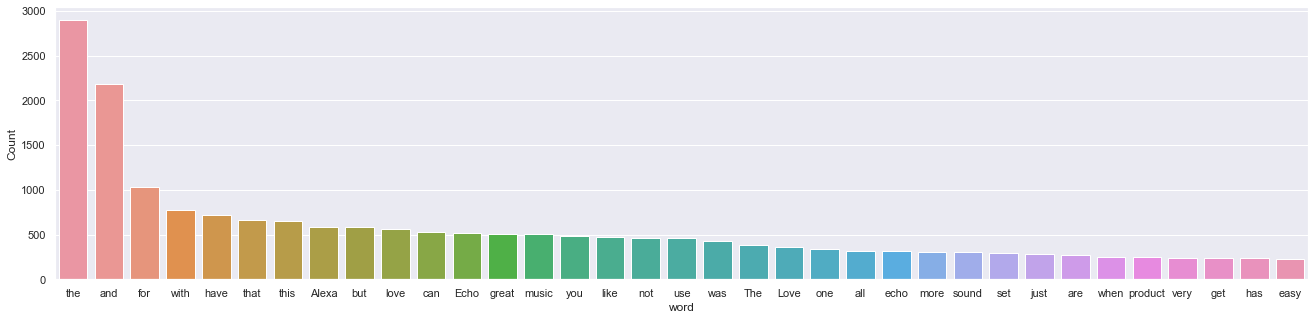

In [62]:
freq_words(data['verified_reviews'], 35) 

In [63]:
import spacy
nlp = spacy.load('en_core_web_lg')

# nlp = spacy.load('en', disable=['parser', 'ner'])

def lemmatization(texts, tags=['NOUN', 'ADJ']): # filter noun and adjective
       output = []
       for sent in texts:
             doc = nlp(" ".join(sent)) 
             output.append([token.lemma_ for token in doc if token.pos_ in tags])
       return output

In [64]:
tokenized_reviews = pd.Series(reviews).apply(lambda x: x.split())
print(tokenized_reviews[1])

['loved']
